# Portfolio Optimization

# Imports

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import cvxpy

# Historical data
import yfinance as yf
import pandas_datareader.data as web

# plot
import matplotlib.pyplot as plt

# PyPortfolioOpt
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import objective_functions as objfunc
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import plotting

In [2]:
date_rng = pd.date_range(start='1/1/2018', end='3/30/2021', freq='H')
timestamp_date_rng = pd.to_datetime(date_rng, infer_datetime_format=True)

# Build Historical Time Series dataframe

In [3]:
def multi_stock():
    tickers_list = ['MLM','ITW','GOOGL','AAPL','MSFT','JNJ','AMT','SPG','VZ','JPM','C','GSK','ACGL','RE','ATO']
    data = yf.download(tickers_list,'2015-1-1')['Adj Close']
    return data
df = multi_stock()
df.tail(2)

[*********************100%***********************]  15 of 15 completed


,AAPL,ACGL,AMT,ATO,C,GOOGL,GSK,ITW,JNJ,JPM,MLM,MSFT,RE,SPG,VZ
Date,,,,,,,,,,,,,,,
2021-03-29,121.389999,38.849998,241.830002,98.849998,71.580002,2045.790039,36.689999,226.779999,166.039993,152.679993,340.700012,235.240005,254.089996,113.809998,58.830002
2021-03-30,119.820000,39.119999,237.940002,98.660004,72.839996,2045.790039,36.410000,223.919998,165.110199,154.074997,341.269989,232.130005,255.070007,115.440002,58.424999


# Expected Returns

In [4]:
mu = mean_historical_return(df)
mu

AAPL     0.287148
ACGL     0.118264
AMT      0.171820
ATO      0.121477
C        0.069574
GOOGL    0.242258
GSK      0.031665
ITW      0.174554
JNJ      0.105978
JPM      0.187495
MLM      0.208818
MSFT     0.318575
RE       0.092158
SPG     -0.031171
VZ       0.083372
dtype: float64

# Covariance Matrix

In [5]:
S = CovarianceShrinkage(df).ledoit_wolf()
S

,AAPL,ACGL,AMT,ATO,C,GOOGL,GSK,ITW,JNJ,JPM,MLM,MSFT,RE,SPG,VZ
AAPL,0.088325,0.030521,0.029598,0.019653,0.047654,0.047008,0.022758,0.036181,0.023285,0.038166,0.031560,0.054818,0.027024,0.031195,0.015214
ACGL,0.030521,0.077119,0.031672,0.030902,0.062334,0.029467,0.023144,0.037865,0.022585,0.052329,0.042937,0.032482,0.054110,0.057692,0.019530
AMT,0.029598,0.031672,0.063574,0.030674,0.031351,0.026380,0.023566,0.025558,0.022907,0.026767,0.025676,0.033071,0.025724,0.033107,0.018187
ATO,0.019653,0.030902,0.030674,0.052685,0.024195,0.016806,0.019304,0.024896,0.021323,0.022920,0.021967,0.021273,0.026790,0.031428,0.019139
C,0.047654,0.062334,0.031351,0.024195,0.125477,0.044399,0.027235,0.054430,0.027131,0.090815,0.064900,0.047931,0.051022,0.081760,0.022957
GOOGL,0.047008,0.029467,0.026380,0.016806,0.044399,0.073108,0.019983,0.031628,0.021835,0.035432,0.030047,0.052866,0.025026,0.030584,0.014695
GSK,0.022758,0.023144,0.023566,0.019304,0.027235,0.019983,0.043030,0.022714,0.019818,0.023683,0.022264,0.025278,0.020213,0.022477,0.015360
ITW,0.036181,0.037865,0.025558,0.024896,0.054430,0.031628,0.022714,0.062855,0.025579,0.047853,0.043149,0.036985,0.032003,0.041048,0.019223
JNJ,0.023285,0.022585,0.022907,0.021323,0.027131,0.021835,0.019818,0.025579,0.038318,0.025168,0.018119,0.025953,0.021404,0.018311,0.017027
JPM,0.038166,0.052329,0.026767,0.022920,0.090815,0.035432,0.023683,0.047853,0.025168,0.084861,0.054229,0.039827,0.044586,0.062460,0.021316


<AxesSubplot:>

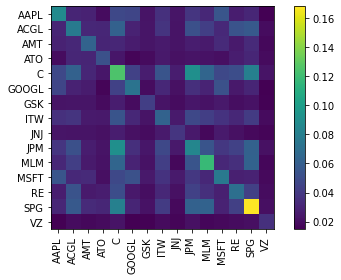

In [6]:
plotting.plot_covariance(S)

# Construct Efficient Frontier

...solve for the optimal weights of the set of all optimal portfolios along the efficient frontier as a convex
optimization problem ussing cvxpy. then define a cost function to determine the most optimal portfolio among the set of all optimal portfolios along the frontier...



# Max Sharpe

Expected annual return: 29.0%
Annual volatility: 24.1%
Sharpe Ratio: 1.12


OrderedDict([('AAPL', 0.20693),
             ('ACGL', 0.0),
             ('AMT', 0.04149),
             ('ATO', 0.01587),
             ('C', 0.0),
             ('GOOGL', 0.01638),
             ('GSK', 0.0),
             ('ITW', 0.0),
             ('JNJ', 0.0),
             ('JPM', 0.0),
             ('MLM', 0.10972),
             ('MSFT', 0.60961),
             ('RE', 0.0),
             ('SPG', 0.0),
             ('VZ', 0.0)])

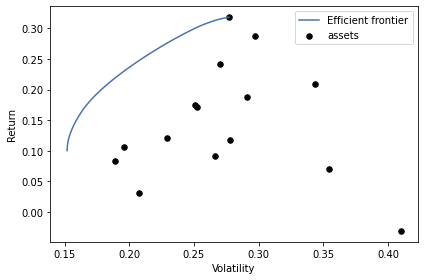

In [7]:
ef = EfficientFrontier(mu, S)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)


weights = ef.max_sharpe()
ret = ef.portfolio_performance(verbose=True)

cleaned_weights = ef.clean_weights()
cleaned_weights


In [8]:
# Allocation
latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000)
allocation, leftover = da.lp_portfolio()
allocation

{'AAPL': 35, 'AMT': 3, 'ATO': 4, 'MLM': 7, 'MSFT': 53}

In [9]:
leftover

6.059806823730469

<AxesSubplot:xlabel='Weight'>

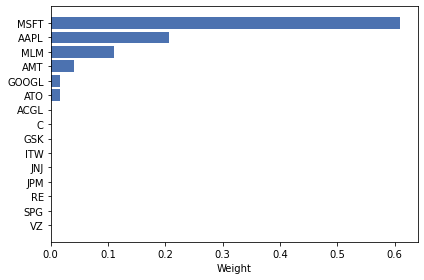

In [10]:
plotting.plot_weights(weights)

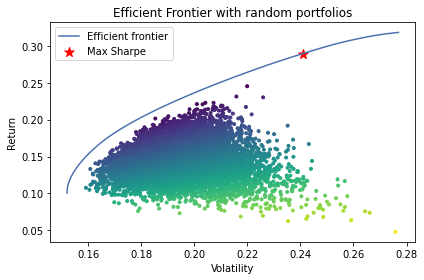

In [11]:
ef = EfficientFrontier(mu, S)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

# Min Volatility

In [12]:
ef = EfficientFrontier(mu, S)

weights = ef.min_volatility()
x = ef.portfolio_performance(verbose=True)

cleaned_weights = ef.clean_weights()
cleaned_weights



Expected annual return: 10.0%
Annual volatility: 15.2%
Sharpe Ratio: 0.53


OrderedDict([('AAPL', 0.01314),
             ('ACGL', 0.0),
             ('AMT', 0.0105),
             ('ATO', 0.09715),
             ('C', 0.0),
             ('GOOGL', 0.0761),
             ('GSK', 0.20249),
             ('ITW', 0.0),
             ('JNJ', 0.20902),
             ('JPM', 0.0),
             ('MLM', 0.02477),
             ('MSFT', 0.0),
             ('RE', 0.02706),
             ('SPG', 0.0),
             ('VZ', 0.33977)])

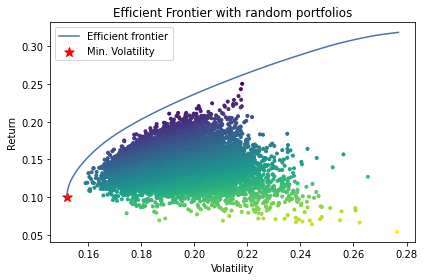

In [13]:
ef = EfficientFrontier(mu, S)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef.min_volatility()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min. Volatility")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [14]:
#Allocation
latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000)
allocation, leftover = da.lp_portfolio()
allocation

{'AAPL': 2,
 'AMT': 1,
 'ATO': 17,
 'GOOGL': 1,
 'GSK': 111,
 'JNJ': 25,
 'MLM': 1,
 'RE': 2,
 'VZ': 116}

In [15]:
leftover

1.4350242614746094

<AxesSubplot:xlabel='Weight'>

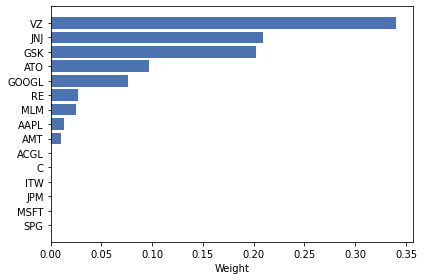

In [16]:
plotting.plot_weights(weights)

# Incentivize non-zero allocation weightings

In [17]:
'''
add additional cost function in order to penalize portfolios with allocations very close to zero so as to 
incentivize the optimizer to select portfolios comprised of non zero weightings - This returns more diversified 
portfolios that are more suitable for the real world
'''
ef = EfficientFrontier(mu, S)

ef.add_objective(objfunc.L2_reg, gamma=0.1)

weights = ef.max_sharpe()
ret = ef.portfolio_performance(verbose=True)

cleaned_weights = ef.clean_weights()
cleaned_weights

Expected annual return: 25.1%
Annual volatility: 21.4%
Sharpe Ratio: 1.08


/Users/michaelsands/source/repos/PyPortfolioOpt/pypfopt/efficient_frontier/efficient_frontier.py:247: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('AAPL', 0.20976),
             ('ACGL', 0.0),
             ('AMT', 0.09152),
             ('ATO', 0.04836),
             ('C', 0.0),
             ('GOOGL', 0.14966),
             ('GSK', 0.0),
             ('ITW', 0.05435),
             ('JNJ', 0.00177),
             ('JPM', 0.04967),
             ('MLM', 0.10588),
             ('MSFT', 0.28861),
             ('RE', 0.0),
             ('SPG', 0.0),
             ('VZ', 0.00042)])

In [18]:
#Allocation
latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000)
allocation, leftover = da.lp_portfolio()
allocation

{'AAPL': 36,
 'AMT': 8,
 'ATO': 10,
 'GOOGL': 1,
 'ITW': 5,
 'JNJ': 1,
 'JPM': 7,
 'MLM': 7,
 'MSFT': 25,
 'VZ': 1}

In [19]:
leftover

136.76970291137695

<AxesSubplot:xlabel='Weight'>

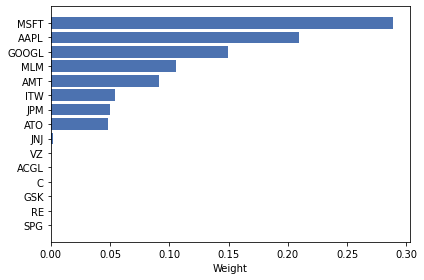

In [20]:
plotting.plot_weights(weights)

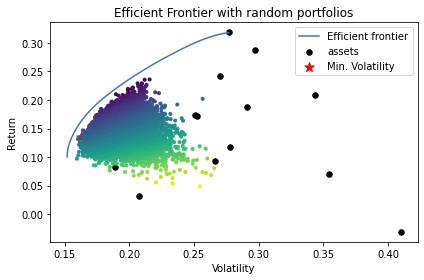

In [21]:
ef = EfficientFrontier(mu, S)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

ef.add_objective(objfunc.L2_reg, gamma=0.1) # insert our additional obj func

# Find the tangency portfolio
ef.min_volatility()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min. Volatility")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()